In [29]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
class Molecules:
    def __init__(self, ifn):
        with open(ifn, "r") as ofn:
            lines = ofn.readlines()
            
        for ind, l in enumerate(lines):
            sp = l.split()
            if len(sp) < 1:
                continue
            if len(sp) > 1:
                if sp[1] == "atoms":
                    self.numAtom = int(sp[0])
                if sp[1] == "bonds":
                    self.bonds = int(sp[0])
                if sp[1] == "angles":
                    self.angles = int(sp[0])
                if sp[1] == "dihedrals":
                    self.dihedrals = int(sp[0])
                if sp[1] == "impropers":
                    self.impropers = int(sp[0])
                    
            if sp[0] == "Types":        
                self.InitIDs = [ [int(l.split()[0]),l.split()[1]] for l in lines[ind+2:ind+2+self.numAtom] ]

            if sp[0] == "Charges":        
                self.Charges = {int(l.split()[0]):l.split()[1] for l in lines[ind+2:ind+2+self.numAtom] }

            if sp[0] == "Coords":        
                self.Coords = {int(l.split()[0]):"\t".join(l.split()[1:]) for l in lines[ind+2:ind+2+self.numAtom] }
            
            if sp[0] == "Bonds":
                self.Bonds = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.bonds]]
                
            if sp[0] == "Angles":
                self.Angles = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.angles]]
                
            if sp[0] == "Dihedrals":
                self.Dihedrals = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.dihedrals]]         
                
            if sp[0] == "Impropers":
                self.Impropers = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.impropers]]        
    
    def Delete_atoms(self, delete_atoms):
        
        self.InitIDs = {key:val for key,val in self.InitIDs if key not in delete_atoms}
        self.old2newid = {key:ind+1 for ind,key in enumerate(self.InitIDs)}
        self.new2old = {value: key for key, value in self.old2newid.items()}
        
        self.InitIDs = {self.old2newid[key]:val for key,val in self.InitIDs.items()}
        self.Charges = {self.old2newid[key]:val for key,val in self.Charges.items() if key in self.old2newid}
        self.Coords = {self.old2newid[key]:val for key,val in self.Coords.items() if key in self.old2newid}
        
        self.Bonds = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Bonds if all(elem in self.old2newid for elem in l[1:])]
        self.Angles = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Angles if all(elem in self.old2newid for elem in l[1:])]
        self.Dihedrals = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Dihedrals if all(elem in self.old2newid for elem in l[1:])]
        self.Impropers = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Impropers if all(elem in self.old2newid for elem in l[1:])]
        
        self.numAtom = len(self.InitIDs)
        self.bonds = len(self.Bonds)
        self.angles = len(self.Angles)
        self.dihedrals = len(self.Dihedrals)
        self.impropers = len(self.Impropers)
        
    def Write_molecule(self, ifn):
        with open(ifn, "w") as ofn:
            ofn.write("delete edged atoms \n")
            ofn.write(f"{self.numAtom} atoms\n{self.bonds} bonds\n{self.angles} angles\n{self.dihedrals} dihedrals\n{self.impropers} impropers\n")
            ofn.write("\nTypes\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.InitIDs.items()]))
            ofn.write("\n\nCharges\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.Charges.items()]))
            ofn.write("\n\nCoords\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.Coords.items()]))
            ofn.write("\n\nBonds\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Bonds)]))
            ofn.write("\n\nAngles\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Angles)]))
            ofn.write("\n\nDihedrals\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Dihedrals)]))
            ofn.write("\n\nImpropers\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Impropers)]))
            
    def Write_xyz(self,ifn):
        with open(ifn, "w") as ofn:
            ofn.write(f"{self.numAtom}\n")
            ofn.write("mol\n")
            ofn.write("\n".join([ "\t".join([str(v2),v1]) for v1,v2 in zip(self.Coords.values(),self.InitIDs.values())]))

In [31]:
def show_nodes(G):
    # ノードの座標を設定
    pos = nx.spring_layout(G)

    # ノードのラベルを取得
    labels = nx.get_node_attributes(G, 'label')

    # ラベルの座標を微調整
    label_pos = {}
    for node, coords in pos.items():
        label_pos[node] = (coords[0], coords[1] + 0.08)

    # グラフを描画
    plt.rcParams["figure.figsize"] = [10,10.0]  
    nx.draw_networkx(G, pos)
    nx.draw_networkx_labels(G, label_pos, labels, font_size=12, font_family='serif')
    plt.axis('off')
    plt.show()

In [32]:
def check_coord(id,elem,num):
    elem_num = {"H":1, "C":4, "O":2, "N":3}
    if num != elem_num[elem]:
        return id
    else:
        return 0

In [33]:
type_elem = {1:"C", 2:"C", 3:"C",4:"H",5:"H",6:"O",7:"O",8:"O"}
InitIDs = [10,62]
Bonding = [11,58]
Delete = [[10,11],[58,62]]
InitIDs_post = [10,12]

In [34]:
########input########
pre_mol = Molecules("./pre-mol.data")
########input########


G = nx.Graph()
G.add_nodes_from([i for i in range(1,pre_mol.numAtom+1)])
for node in G.nodes():
    G.nodes[node]['label'] = type_elem[int(pre_mol.InitIDs[node-1][1])]

G.add_edges_from([[b[1], b[2]] for b in pre_mol.Bonds])


In [35]:
Crete = list(list(map(int,val)) for val in [InitIDs,Bonding])
G_pre = G.copy()

G_pre.add_edges_from(Crete)
G_pre.remove_edges_from(Delete)

In [36]:
near_nodes = []

for atom in InitIDs:
    distances = nx.single_source_shortest_path_length(G_pre, atom)
    near_nodes.extend([n for n, d in distances.items() if d <= 10])
    
other_nodes = set(G_pre.nodes()) - set(near_nodes)
delete_nodes_pre = list(set(G_pre.nodes()) - set(near_nodes))
G_pre.remove_nodes_from(delete_nodes_pre)


In [37]:
post_mol = Molecules("./post-mol.data")

G = nx.Graph()
G.add_nodes_from([i for i in range(1,post_mol.numAtom+1)])

for node in G.nodes():
    G.nodes[node]['label'] = type_elem[int(post_mol.InitIDs[node-1][1])]

G.add_edges_from([[b[1], b[2]] for b in post_mol.Bonds])
G_post = G.copy()

near_nodes=[]
for atom in InitIDs_post:
    distances = nx.single_source_shortest_path_length(G_post, atom)
    
    near_nodes.extend([n for n, d in distances.items() if d <= 10])

other_nodes = set(G_post.nodes()) - set(near_nodes)
delete_nodes_post = list(set(G_post.nodes()) - set(near_nodes))
G_post.remove_nodes_from(delete_nodes_post)

In [38]:
GM = nx.isomorphism.GraphMatcher(G_pre, G_post,node_match=lambda x, y: x['label'] == y['label'])

if GM.is_isomorphic():
    node_mapping = GM.mapping
else:
    print("マッチングできないよ STEP1")

In [39]:
change_type_ids_pre = []
change_type_ids_post = []
for a,b in GM.mapping.items():
    pre_type = pre_mol.InitIDs[a-1][1]
    post_type = post_mol.InitIDs[b-1][1]
    if pre_type != post_type:
        change_type_ids_pre.append(a)
        change_type_ids_post.append(b)

print(change_type_ids_pre)
print(change_type_ids_post)


[10, 62, 58, 65, 68]
[10, 12, 15, 22, 25]


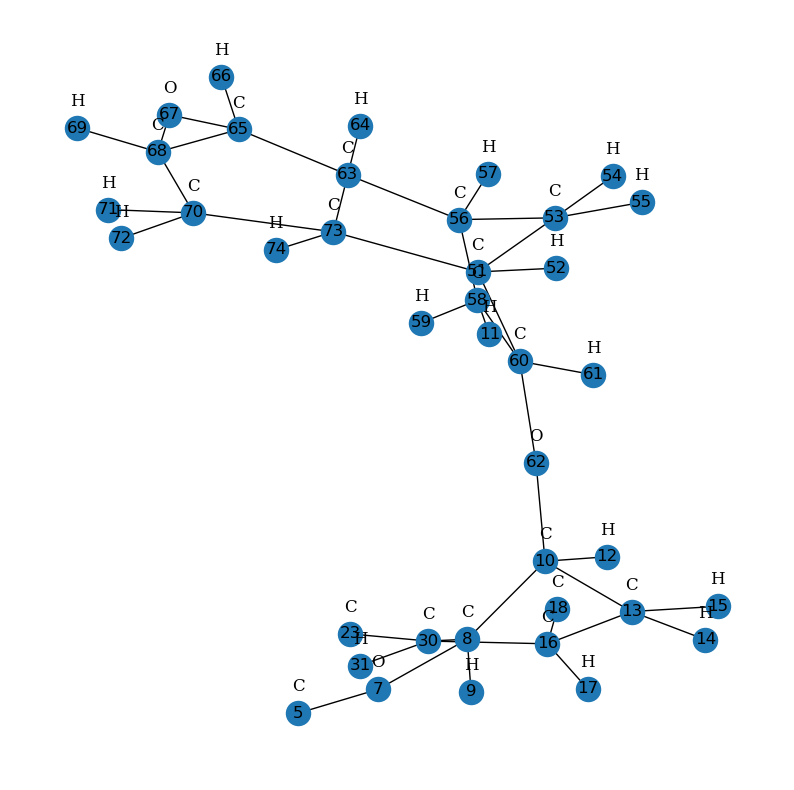

In [40]:
near_nodes=[]
for atom in set(InitIDs+change_type_ids_pre):
    distances = nx.single_source_shortest_path_length(G_pre, atom)
    near_nodes.extend([n for n, d in distances.items() if d <= 3])

other_nodes = set(G_pre.nodes()) - set(near_nodes)
delete_nodes_pre2 = list(set(G_pre.nodes()) - set(near_nodes))

G_pre.remove_nodes_from(delete_nodes_pre2)
pre_mol.Delete_atoms(delete_nodes_pre+delete_nodes_pre2)
show_nodes(G_pre)

In [41]:
near_nodes=[]
for atom in set(InitIDs_post+change_type_ids_post):
    distances = nx.single_source_shortest_path_length(G_post, atom)
    near_nodes.extend([n for n, d in distances.items() if d <= 3])

other_nodes = set(G_post.nodes()) - set(near_nodes)
delete_nodes_post2 = list(set(G_post.nodes()) - set(near_nodes))

G_post.remove_nodes_from(delete_nodes_post2)
post_mol.Delete_atoms(delete_nodes_post+delete_nodes_post2)


In [42]:
GM = nx.isomorphism.GraphMatcher(G_pre, G_post,node_match=lambda x, y: x['label'] == y['label'])

if GM.is_isomorphic():
    node_mapping = GM.mapping
    
    edge_atoms = []
    for node, data in G_pre.nodes.data():
        degree = G_pre.degree(node)
        label = data['label']
        flag = check_coord(node,label,degree)
        if flag:
            edge_atoms.append(flag)
    with open("semi.map", "w") as ofn:
        ofn.write("this map is created by SemiMapper\n\n")
        ofn.write(f"{G_pre.number_of_nodes()} equivalences\n")
        ofn.write(f"{len(edge_atoms)} edgeIDs\n\n")
        ofn.write("InitiatorIDs\n\n")
        ofn.write("\n".join([str(pre_mol.old2newid[ind]) for ind in InitIDs]))
        ofn.write("\n\nEdgeIDs\n\n")
        ofn.write("\n".join([str(pre_mol.old2newid[ind]) for ind in edge_atoms]))
        ofn.write("\n\nEquivalences\n\n")
        ofn.write("\n".join([ "\t".join([str(pre_mol.old2newid[k]), str(post_mol.old2newid[v])]) for k,v  in node_mapping.items()]))
    pre_mol.Write_molecule("cleaned_pre-mol")
    post_mol.Write_molecule("cleaned_post-mol")
    
    for s in change_type_ids_pre:
        for t in edge_atoms:
            dist =  nx.shortest_path_length(G_pre, source=s, target=t)
            if dist < 3:
                print(dist, s , t)

else:
    print("マッチングできないよ STEP2")
    

print(edge_atoms)
print(change_type_ids_pre)

[5, 18, 23]
[10, 62, 58, 65, 68]
